In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cardio = pd.read_csv('./data/cardio_train.csv', sep = ';')
df_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [2]:
df_cardio['ap_lo'].min(), df_cardio['ap_hi'].min(), df_cardio['ap_lo'].max(), df_cardio['ap_hi'].max()

(-70, -150, 11000, 16020)

## Metrics overview
- ap_hi is Systolic blood pressure. Normal 120 or little below, max 200, considered low under 90. Hard to find realistic lowest viable value, maybe 60 ? In some extreme case some humans can survive up to 300.
- ap_lo Diastolic blood pressure Normal 80,  Max 140, considered low under 60 unrealistic under 40 ?
- height 251 max

In [10]:
df_cardio['age_years'] = df_cardio['age'].apply(lambda x : x/365)
df_cardio['age_years'].min(), df_cardio['age_years'].max()
#Age range seems all good

(29.583561643835615, 64.96712328767123)

In [11]:
data_filters = ['ap_hi > 300 or ap_hi < 60 ', 'height < 80', 'weight < 30', 'ap_lo > 200 or ap_lo < 40']
for condition in data_filters:
    df_cardio.drop(df_cardio.query(condition).index, axis=0, inplace = True)

df_cardio.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 68749 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68749 non-null  int64  
 1   age          68749 non-null  int64  
 2   gender       68749 non-null  int64  
 3   height       68749 non-null  int64  
 4   weight       68749 non-null  float64
 5   ap_hi        68749 non-null  int64  
 6   ap_lo        68749 non-null  int64  
 7   cholesterol  68749 non-null  int64  
 8   gluc         68749 non-null  int64  
 9   smoke        68749 non-null  int64  
 10  alco         68749 non-null  int64  
 11  active       68749 non-null  int64  
 12  cardio       68749 non-null  int64  
 13  age_years    68749 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.9 MB


### a)

In [15]:
cardio_count = df_cardio['cardio'].value_counts()
print(f"In the dataset, {cardio_count[1]} people suffer from an heart condition, and {cardio_count[0]} don't")


In the dataset, 34027 people suffer from an heart condition, and 34722 don't


### b)

<AxesSubplot:ylabel='cholesterol'>

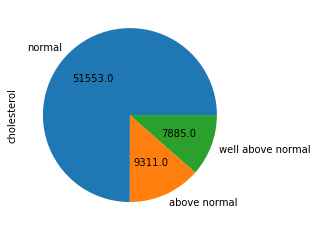

In [24]:
import numpy as np

labels = ['normal', 'above normal', 'well above normal']
chol_count = df_cardio['cholesterol'].value_counts()

def absolute_value(val): #https://stackoverflow.com/questions/41088236/how-to-have-actual-values-in-matplotlib-pie-chart-displayed
    a  = np.round(val/100.*chol_count.sum(), 0)
    return a


chol_count.plot.pie(labels = labels,  autopct=absolute_value)

<AxesSubplot:xlabel='age_years', ylabel='Count'>

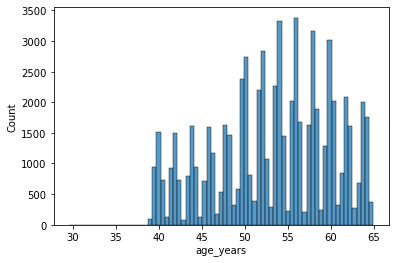

In [26]:
#Round age years
sns.histplot(x = df_cardio['age_years'])